# Numpy
![logo](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/512px-NumPy_logo_2020.svg.png)

Přednášky:
  * http://vyuka.ookami.cz/materialy/python/numpy/overview.xml
  * http://vyuka.ookami.cz/materialy/python/numpy/arrays.creation.xml
  * http://vyuka.ookami.cz/materialy/python/numpy/arrays.operation.xml
  * http://vyuka.ookami.cz/materialy/python/numpy/broadcasting.xml
  * http://vyuka.ookami.cz/materialy/python/numpy/arrays.slicing.xml
  * http://vyuka.ookami.cz/materialy/python/numpy/slices.xml

Vynikající úvod do numpy: [https://towardsdatascience.com/the-ultimate-beginners-guide-to-numpy-f5a2f99aef54](https://towardsdatascience.com/the-ultimate-beginners-guide-to-numpy-f5a2f99aef54)

Obrázky v tomto materiálu přebírám z [https://medium.com/@yp7121/a-visual-intro-to-numpy-2903458d25ea](https://medium.com/@yp7121/a-visual-intro-to-numpy-2903458d25ea)

Numpy se standartně importuje jako `np` - samozřejmě si ten import můžete pojmenovat jak chcete, ale je takovým dobrým zvykem dělat to takto:

In [27]:
import numpy as np

## arrays

Vytváření ndarrays https://numpy.org/doc/1.18/reference/routines.array-creation.html#routines-array-creation

Nejjednodušší cesta je vytvořit array ze seznamu.

In [28]:
# ndarray, n=1
a = np.array([1, 2, 3])
# ndarray, n=2
b = np.array([[1, 2], [5, 3], [4, 6]])

print(a)
print(b)
type(b)

[1 2 3]
[[1 2]
 [5 3]
 [4 6]]


numpy.ndarray

In [29]:
b.shape

(3, 2)

In [30]:
print(b[1:3, 0:1])
print(b[1:3, 0:1].shape)

[[5]
 [4]]
(2, 1)


Poznámka: jak vídíme, typ array se jmenuje ndarray - to proto, že array může být obecně n-dimenzionální.

Array si také můžeme vytvořit pomocí `np.zeros` (bude obsahovat samé nuly), `np.ones` (bude obsahovat samé jedničky), nebo `np.random` (bude obsahovat náhodná čísla). A pak existují další desítky metod pro vytváření polí z různých typů dat: [NumPy DOC - array creation](https://numpy.org/doc/stable/reference/routines.array-creation.html#routines-array-creation).

In [31]:
print(np.zeros((2, 3)))
print(np.ones((2, 3)))
print(np.random.random((2, 3)))
print(np.eye(3, 3))
print(np.full((2, 5), 42))

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[0.03197776 0.28502125 0.54581846]
 [0.33761562 0.15017581 0.80501034]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[42 42 42 42 42]
 [42 42 42 42 42]]


## ndim, size, shape

jak jsme viděli v předchozím případě, argumentem `np.zeros`  je n-tice, která udává tvar (**shape**) výsledného array, počet prvků v této n-tici je počet dimenzí (**ndim**) a pokud prvky této n-tice vynásobíme, dostaneme celkový počet prvků pole (**size**). Blíže to názorně ukazuje následující obrázek.

<img src="https://miro.medium.com/max/1400/0*jM2qCqrGsRD4j58Z.png" width = "900px" />

In [33]:
a = np.ones((4, 3, 2))
print(a)
print(a.shape)
print(a.ndim)
print(a.size)

[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]
(4, 3, 2)
3
24


Tvar pole muzeme zmenit pomoci `np.array.reshape()`:

In [34]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

print(a)
print(a.reshape((2, 5)))
print(a.reshape((5, 2)))
a.reshape((3, 3))  # neprojde, protože 3×3 != 10

[ 1  2  3  4  5  6  7  8  9 10]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


ValueError: cannot reshape array of size 10 into shape (3,3)

Z více rozměrů na jeden to jde více cestami:

In [35]:
a = np.ones((3, 4), dtype=np.uint8) # muzeme udat datovy typ polozek (viz dale)
print(a, a.base)  # base je reference na "puvodni objekt", spousta operaci nad nd.array, je jen "pohled" a data v pameti se nekopiruji
print(a.flatten(), a.flatten().base is a)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]] None
[1 1 1 1 1 1 1 1 1 1 1 1] False


In [ ]:
a = np.ones((3, 4), dtype=np.uint8)
print(a)
# np.array(range(30)).reshape(5,6).dtype
print(a.flat, a.flat.base is a)
print(a.flatten(), a.flatten().base is a)
print(a.ravel(), a.ravel().base is a) # nekopiruje, pokud to jde -> vetsinou to co chcete

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
<numpy.flatiter object at 0x5c4b0ceee1e0> True
[1 1 1 1 1 1 1 1 1 1 1 1] False
[1 1 1 1 1 1 1 1 1 1 1 1] True


Transpozice:

In [ ]:
a = np.ones((3, 1))
print(a)
print(a.T, a.T.base is a) # transpozice je pohledem, nekopiruji se data
print(a.transpose()) # mozne i pro vice os (3D a vice-D pole), ale pak nutno pouzit jako np.transpose(a, axes=[1, 2])

[[1.]
 [1.]
 [1.]]
[[1. 1. 1.]] True
[[1. 1. 1.]]


## Datové typy

NumPy umí vícero [datových typů](https://numpy.org/doc/stable/user/basics.types.html?highlight=data%20types), prozatím si vystačíte s `np.intc` (int), `np.float64` (double), případně `np.uint` (long). Parametr dtype rozumí i nativním pythonovým typům `int` (ekvivalent `np.int_`) a `float` (ekvivalent `np.float_`).

In [36]:
print(np.ones((3, 3)).dtype)
a = np.ones((3, 3), dtype=np.uint16)
print(a)
print(np.ones((3, 3), dtype=np.float32))
print(a.dtype)
print(a.astype(dtype = np.float32).dtype)

float64
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
uint16
float32


## axis, rank

Osou (**axis**) se rozumí konkrétní dimenze (axis=0 -> prvni dimenze atd), **rank** je počet os v array (tzn. počet dimenzí). N-tice shape nám pak říká kolik hodnot je v jednotlivých osách. Je to hezky vidět na následujícím obrázku: shape (rozměr, tj. počet hodnot v jednotlivých osách) = (3, 2), ndim (rank, pocet os) = 2, size (celkový počet hodnot v array) = 6

<img src="https://miro.medium.com/max/1400/0*Wurw15FrTdeSp17P.png" width = "900px" />

V 2D array máme dvě osy - **axis=0 jsou indexy (čísla) řádků, axis=1 jsou indexy(čísla) sloupců**. Axis je často pojmenovaným argumentem různých funkcí, např. max:


In [37]:
b = np.array(range(30)).reshape(5,6)
print(b)
print(b.ndim) # pocet dimenzi = pocet os = rank

print(b.max()) # maximum pres cele array
print(b.max(axis=0)) # maximum pres vsechny radky, tj. pro kazdy sloupec
print(b.max(axis=1)) # maximum pres vsechny sloupce, tj. pro kazdy radek
r = np.max(b)
print(r)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]
2
29
[24 25 26 27 28 29]
[ 5 11 17 23 29]
29


Pokud by nebylo jasné jak fungují agregační funkce ve vztahu k osám, tak následujíci obrázek vydá za tisíc slov.

<img src="https://i.stack.imgur.com/h1alT.jpg" width="450px"/>

(obrázek z https://stackoverflow.com/questions/17079279/how-is-axis-indexed-in-numpys-array)

## indexing, slicing

Základní 1D výřezy fungují očekávaným způsobem:


In [38]:
c = np.array(range(30))
print(c)
c[10:21:2]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


array([10, 12, 14, 16, 18, 20])

Jak ale používat výřezovou notaci na  vícereozměrná array? A zde se dostáváme k jedné zajímavosti: python umí výřezovou notaci v n rozměrech, ale jediné místo, kde se reálně používá je právě numpy. Přečtěte si [přednášku](http://vyuka.ookami.cz/materialy/python/numpy/arrays.slicing.xml), je to tam krásně popsané.

Nám stačí říct, že **jednotlivé osy se ve výřezové notaci oddělují čárkou**.

In [39]:
b = np.array(range(30)).reshape(5, 6)
print(b)
print(b[3, 5]) #ctvrty radek, sesty sloupec (python, tedy i numpy indexuji od nuly)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]
23


In [40]:
print(b[2:3, 4:5])
print(b[2:3, 4:5].shape)

[[16]]
(1, 1)


In [41]:
b[0:2, 2:6]  # prvni az druhy radek a zaroven treti az paty sloupec
b[0:2, 2:6] = 0  # do vybrane oblasti muzume neco ulozit
print(b)

[[ 0  1  0  0  0  0]
 [ 6  7  0  0  0  0]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]


In [42]:
b[0:2, :] # nebo b[0:2, ::] nebo b[0:2, ] nebo b[0:2] - prvni dva radky

array([[0, 1, 0, 0, 0, 0],
       [6, 7, 0, 0, 0, 0]])

In [44]:
b[:, 0:3] # nebo b[::, 0:3] - prvni tri sloupce.
# POZOR b[, 0:3] nelze použít

array([[ 0,  1,  0],
       [ 6,  7,  0],
       [12, 13, 14],
       [18, 19, 20],
       [24, 25, 26]])

Obdobně pak i pro pole většího ranku. Pokud chápete rozdily mezi `shape` vs. `axis` vs. `ndims` a uvědomíte si, že při indexování/slicingu vícerozměrných polí musíte numpy sdělit co chcete v konkrétních osách, asi nebudete mít problém.

Ještě je na místě vhodné podotknout, že jde indexovat například i jinými np.array, říká se tomu *fancy indexing*, ale má to nevýhodu v tom, že na rozdíl od běžných výřezů se kopírují data, což se projeví negativně na rychlosti. Kde to jde, je pak vhodné použít dedikované metody (např. np.take() pro výběr dle indexů v 1 ose - viz. přednáška slajd 8/19).

In [50]:
a = np.eye(3, 3)
print(a)
b = a[1:2, :]
print(b, b.base is a) # array.base je reference na puvodni objekt, pokud s nim ten aktualni sdili pamet
selector = np.array([2])
print(f'selector = {selector}')
c = a[selector, :]
print(c, c.base is a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 1. 0.]] True
selector = [2]
[[0. 0. 1.]] False


In [54]:
# dalsi ukazka pouziti fancy indexing pro podmineny vyber
a = np.random.random((3, 3))
print(a)
kde = a < 0.5
print(kde)
a[kde] = 42
print(a)

[[0.73280998 0.79938075 0.63681874]
 [0.37946819 0.04104436 0.663666  ]
 [0.04112371 0.88870533 0.91287833]]
[[False False False]
 [ True  True False]
 [ True False False]]
[[ 0.73280998  0.79938075  0.63681874]
 [42.         42.          0.663666  ]
 [42.          0.88870533  0.91287833]]


## broadcasting

Pod pojmem broadcasting je myšleno chování numpy při aritmetických operacích s poli různých tvarů. Pokud je to možné, je tvar menšího pole přizpůsoben (rozšířen) většímu.

In [55]:
b = np.array(range(30)).reshape(5, 6)
print(b)

c = np.ones((1, 6)) # jeden řádek, šest sloupců
print(c)

d = b + c # c je automaticky rozšířeno opakováním řádků na shape (5,6)
print(d)

c = np.ones((5, 1)) # pět řádků, jeden sloupec
d += c # c je automaticky rozšířeno opakováním sloupců na shape (5,6)
print(d)

d += 1 # skalár je rozšířen na array tvaru (5,6) opakováním hodnot pro každý prvek pole
print(d)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]
[[1. 1. 1. 1. 1. 1.]]
[[ 1.  2.  3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11. 12.]
 [13. 14. 15. 16. 17. 18.]
 [19. 20. 21. 22. 23. 24.]
 [25. 26. 27. 28. 29. 30.]]
[[ 2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13.]
 [14. 15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24. 25.]
 [26. 27. 28. 29. 30. 31.]]
[[ 3.  4.  5.  6.  7.  8.]
 [ 9. 10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26.]
 [27. 28. 29. 30. 31. 32.]]


In [56]:
c = np.ones((2, 3))
print(c.shape, d.shape)
d + c # vyhodí ValueError, protoze (2,3) nelze rozsirit na (5,6)

(2, 3) (5, 6)


ValueError: operands could not be broadcast together with shapes (5,6) (2,3) 

## vectorize

Pokud máte vytvořenou funkci, která očekává skalár a vrací skalár a chtěli byste ji aplikovat na celé array, musíte ji nejdříve převést na funkci očekávájící array a vracející array pomocí `np.vectorize`:

In [57]:
b = np.array(range(30)).reshape(5, 6)
print(b)

@np.vectorize
def binar(val):
  if val>14:
    return 1
  else:
    return 0

# print(binar(b)) # vyhodi ValueError

vec_binar = np.vectorize(binar)

print(vec_binar(b))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]


`np.vectorize()` je funkce, která vrací funkci. Přijde vám to povědomé? Ano, `np.vectorize()` lze použít i jako dekorátor (ačkoliv to tak nebylo zamýšleno a pro složitější případy narazíte - viz. https://stackoverflow.com/questions/14986697/numpy-vectorize-as-a-decorator-with-arguments)

In [ ]:
@np.vectorize
def binar(val):
  if val>14:
    return 1
  else:
    return 0

print(binar(b))

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]


## matice

S maticemi je to jako s řadou dalších věcí v numpy - jednu věc lze udělat mnoho způsoby. Většinou budete řešit transpozici a násobení matic. Pro transpozici používejte `ndarray.T` a pro maticové násobení matic operátor `@`

Pokud by vás matice zajímaly více do hloubky, odkáži vás do dokumentace https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html.

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a)

print(a * a) # obycejne nasobeni kazdeho prvku s odpovidajicim prvkem v 2. matici (neni to nasobeni matic!)

b = a.T # nebo b = np.transpose(a) tranzpozice matice
print(b)

print(a @ b) # nebo a.dot(b) nasobeni matic
print(b @ a) # nebo a.dot(b) nasobeni matic

[[1 2]
 [3 4]
 [5 6]]
[[ 1  4]
 [ 9 16]
 [25 36]]
[[1 3 5]
 [2 4 6]]
[[ 5 11 17]
 [11 25 39]
 [17 39 61]]
[[35 44]
 [44 56]]


In [58]:
# je potřeba dávat pozor na rozměrovou kompatibilitu
r = np.random.random((2, 3, 5))
r2 = np.random.random ((5, 3, 2))
r @ r2

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 5)

# Grafické operace

Pro práci s grafikou existuje několik knihoven (velmi známé je OpenCV). Zde v BI-PYT budeme používat Pillow pro načtení a vykreslení obrázku, operace s obrázky budeme řešit pomocí numpy.


In [59]:
!wget https://i.pinimg.com/originals/8a/68/f1/8a68f104fc2394e6cca08922bbecf6d2.jpg

--2024-03-27 14:33:44--  https://i.pinimg.com/originals/8a/68/f1/8a68f104fc2394e6cca08922bbecf6d2.jpg
Resolving i.pinimg.com (i.pinimg.com)... 2.16.27.96, 2.16.27.83, 2a02:26f0:b200::58dd:194b, ...
Connecting to i.pinimg.com (i.pinimg.com)|2.16.27.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589681 (576K) [image/jpeg]
Saving to: ‘8a68f104fc2394e6cca08922bbecf6d2.jpg.1’

8a68f104fc2394e6cca 100%[===================>] 575.86K  --.-KB/s    in 0.03s   

2024-03-27 14:33:44 (17.2 MB/s) - ‘8a68f104fc2394e6cca08922bbecf6d2.jpg.1’ saved [589681/589681]



Načtení obrázku a převod na numpy pole:

<class 'PIL.JpegImagePlugin.JpegImageFile'>
uint8 (2048, 2048, 3)


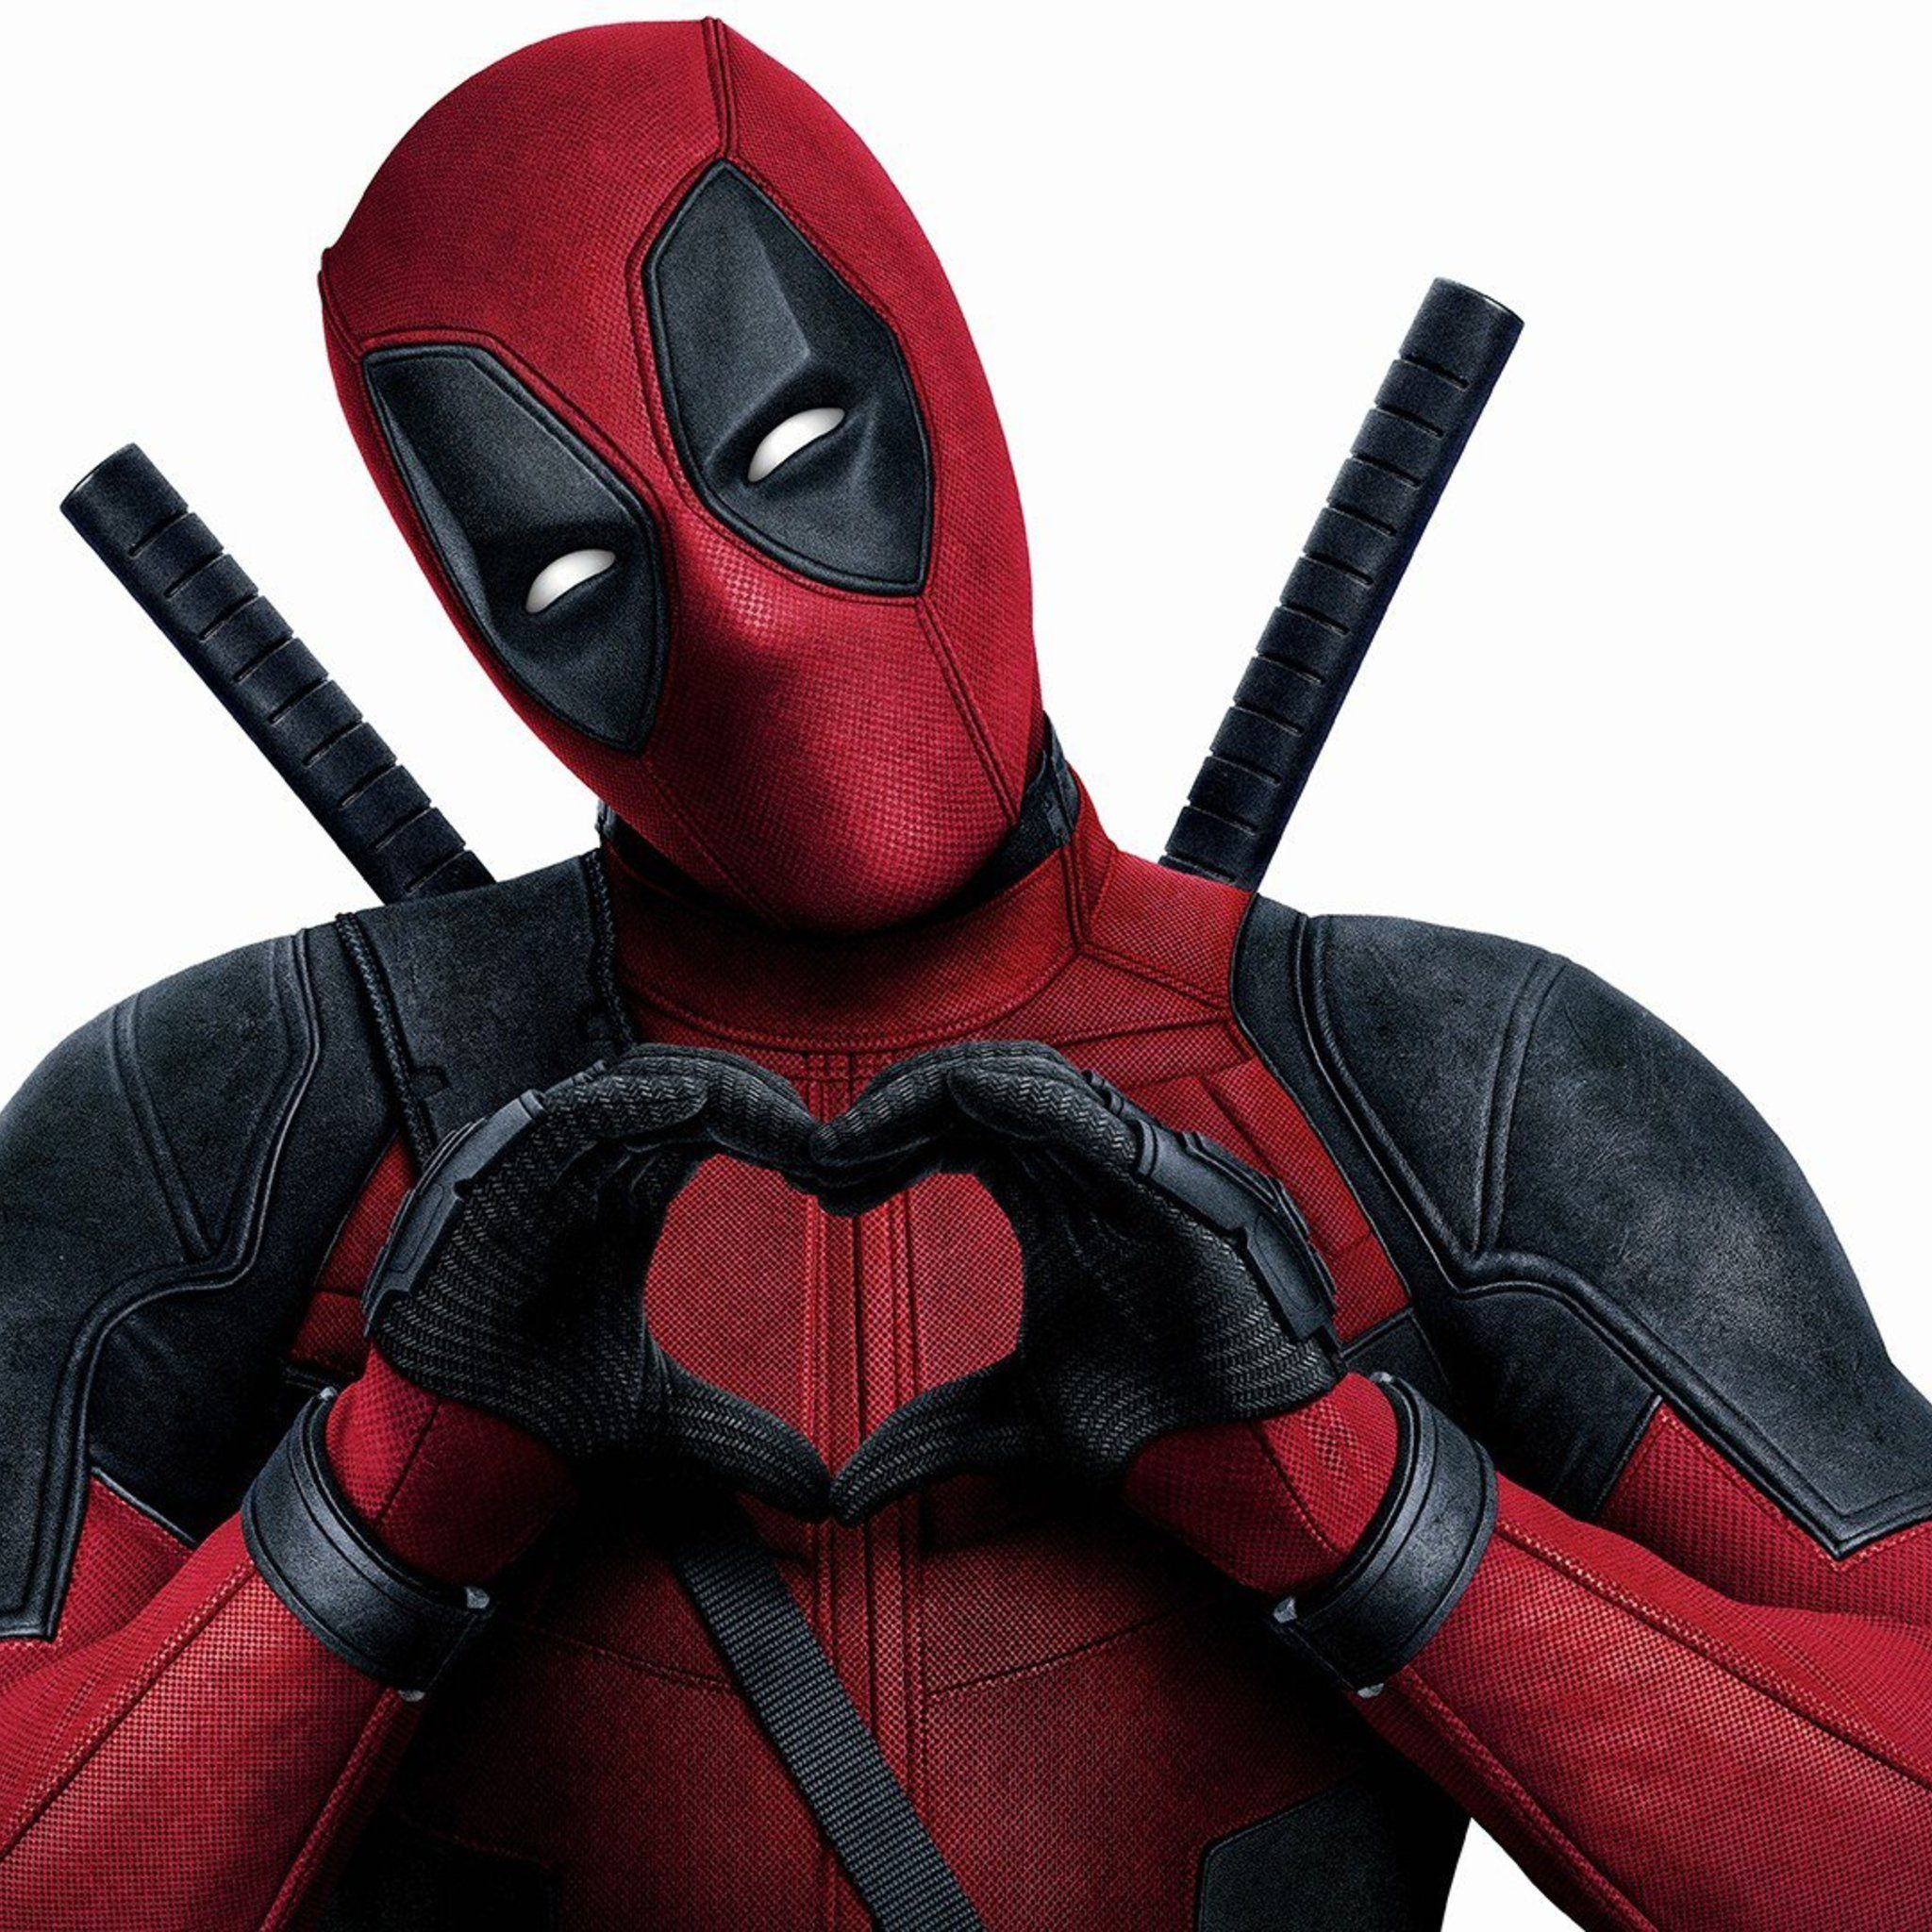

In [ ]:
from PIL import Image  # kdyz si jej budete chtit doinstalovat, je to balicek Pillow

img = Image.open("8a68f104fc2394e6cca08922bbecf6d2.jpg")
print(type(img))
# rychlejsi, ale zpusobi ze interni ndarray bude mit flag.OWNDATA == False
# a tim padem obrazek nepujde menit, dokud si nevyrobime kopii ... viz dale
mr_pool = np.asarray(img)

print(mr_pool.dtype, mr_pool.shape)
Image.fromarray(mr_pool.astype(np.uint8), 'RGB')

In [ ]:
print(mr_pool.shape)
print(mr_pool)

(2048, 2048, 3)
[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[119  33  44]
  [120  37  47]
  [120  40  49]
  ...
  [ 98  16  30]
  [106  18  34]
  [109  18  35]]

 [[128  27  43]
  [133  35  50]
  [137  43  57]
  ...
  [115  33  47]
  [122  34  50]
  [116  25  42]]

 [[129  22  40]
  [139  34  51]
  [148  47  63]
  ...
  [126  44  58]
  [134  46  62]
  [120  29  46]]]


Jak vidíme náš obrázek má rozměry 2048x2048 pixelů a tři barevné kanály (R,G,B).

Nyní již můžeme použít numpy pro práci s obrázkem:

In [ ]:
mr_small_pool = mr_pool[::4, ::4, :] # vybereme každý čtvrtý pixel
print(mr_small_pool.shape)
# manipulace s pixely, ale nepujde:
print(mr_small_pool.flags)
# mr_small_pool.setflags(write=1)
# mr_small_pool.flags.writeable = True
# mr_small_pool[:, :, 0] = 0
print(mr_small_pool.flags)

# kopie uz pujde menit:
pic = mr_small_pool.copy()
print(pic.flags)
pic[100:200, 50:100, 0] = 128

(512, 512, 3)
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



Zpět na obrázek si numpy pole převedeme pomocí `Image.fromarray`

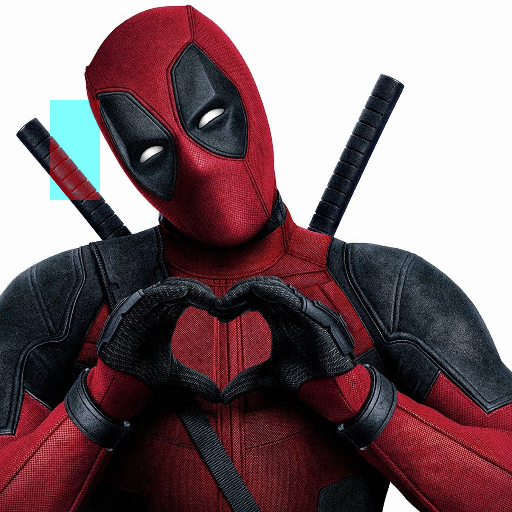

In [ ]:
small_img = Image.fromarray(pic.astype(np.int8), 'RGB')
small_img

Další operace viz tutorial na gitlabu.